Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from PIL import Image

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline


Creat load_images and test it

Dimensions:  (64, 80)


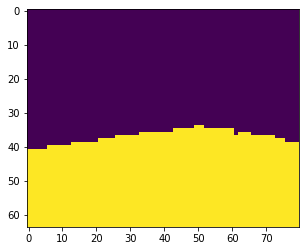

In [2]:
# Load and resize image
def load_image(filepath: str) -> np.ndarray:
    im: Image.Image = Image.open(filepath)
    (width, height) = (im.width // 4, im.height // 4)
    im_resized = im.resize((width, height))
    return np.array(im_resized)

im = load_image('img1737_m.png')
print('Dimensions: ', im.shape)
plt.imshow(im)
plt.show()

Creat an array that has all the maps

In [3]:
import glob
from tqdm import tqdm
image_names = glob.glob('img*.png')
image_mats = []


for image in tqdm(image_names):
    im = load_image(image)
    image_mats.append(im)



100%|██████████| 3601/3601 [00:01<00:00, 3328.19it/s]


In [4]:
image_array = np.array(image_mats)
image_array_flat = np.zeros((3601,64*80))

In [5]:
bucket_array = image_array[0].reshape(-1,1)
image_array_flat[0] = bucket_array.T

for i in range(3601):
    bucket_array = image_array[i].reshape(-1,1)
    image_array_flat[i] = bucket_array.T
    
 

In [6]:
image_array.shape

(3601, 64, 80)

In [7]:
from numpy import genfromtxt
labels = genfromtxt('turn_labels2.csv', delimiter=',')

In [8]:
labels = labels.reshape((-1,1))

Create the decision tree

In [9]:
c = DecisionTreeClassifier(min_samples_split = 30)


In [10]:
train, test = train_test_split(image_array_flat, test_size = 0.15)

In [11]:
ltrain, ltest = train_test_split(labels, test_size = 0.15)

In [12]:
dt = c.fit(train, ltrain)

In [13]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file = f, feature_names  = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = plt.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)
    

In [14]:
lpred = c.predict(test)

In [15]:
lpred

array([ 1.,  1., -1., -1., -1.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,
        0., -1.,  0., -1., -1.,  0.,  0., -1.,  1., -1.,  0.,  0., -1.,
       -1.,  0.,  0., -1., -1.,  0.,  0., -1.,  1.,  0.,  1., -1.,  0.,
        1.,  1.,  0.,  0.,  0., -1.,  1.,  0.,  1.,  0., -1.,  0., -1.,
        0., -1., -1.,  0.,  1., -1.,  0., -1.,  0., -1.,  0., -1.,  0.,
        0.,  0.,  0., -1., -1.,  0.,  1.,  0., -1.,  0.,  0.,  1., -1.,
       -1., -1.,  0., -1., -1., -1.,  0., -1.,  1., -1.,  0.,  1., -1.,
       -1.,  0., -1., -1., -1.,  1.,  0.,  1., -1.,  0.,  0., -1.,  0.,
        0.,  0.,  1., -1., -1., -1., -1., -1.,  0.,  1., -1.,  0., -1.,
       -1., -1., -1.,  0., -1.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0., -1., -1., -1.,  0., -1., -1., -1.,  1.,  0.,  0.,
       -1.,  0.,  0.,  0.,  1., -1., -1., -1., -1.,  0.,  0.,  1., -1.,
        0.,  1., -1.,  0.,  1.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,
       -1.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1.,  0

In [16]:
from sklearn.metrics import accuracy_score

score = accuracy_score(ltest, lpred)*100

In [17]:
score

39.186691312384475